In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Data/munged_salary_raptor.csv", index_col = [0])
df.drop(columns = ["war_reg_season", "war_playoffs", "lg", "pace_impact", "salary"])
df.head()



,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,lg,salary,normalized salary
0,Alaa Abdelnaby,abdelal01,1991,PO,POR,26,13,-6.565556,-1.999625,-8.565181,-0.039028,0.000000,-0.039028,-6.966437,-4.170021,-11.136458,-1.785247,NBA,395000.0,0.033274
1,Alaa Abdelnaby,abdelal01,1991,RS,POR,614,290,-3.827204,-0.447001,-4.274205,-0.226163,-0.226163,0.000000,-3.776125,-1.592067,-5.368192,0.283274,NBA,395000.0,0.033274
2,Alaa Abdelnaby,abdelal01,1992,PO,POR,50,25,-5.430838,-3.112862,-8.543700,-0.077215,0.000000,-0.077215,-5.722269,-4.144577,-9.866847,1.216643,NBA,494000.0,0.039520
3,Alaa Abdelnaby,abdelal01,1992,RS,POR,1948,934,-2.480005,-0.123125,-2.603129,0.070322,0.070322,0.000000,-2.416858,-0.634025,-3.050883,0.466668,NBA,494000.0,0.039520
4,Alaa Abdelnaby,abdelal01,1993,PO,BOS,128,68,-9.774333,-3.596499,-13.370831,-0.381918,0.000000,-0.381918,-9.480059,-4.481334,-13.961393,0.456135,NBA,500000.0,0.035714


### Plot Average Normalized Salary Cap Over Time
---
Average normalized salary by team over time

In [3]:
teams = pd.read_table("../Data/NBA_teams.txt", sep = "\t")
teams = pd.read_table("../Data/NBA_teams.txt", sep = "\t")
team_to_abr = dict(zip(teams["Franchise"], teams["Abbreviation/Acronym"]))

div_team = {'Atlantic' : ["BOS", "PHI", "TOR", "NYK", "BKN"], 
             'Central' : ["MIL", "CHI", "CLE", "DET", "IND"], 
             'Southeast' : ["MIA", "ATL", "CHA", "WAS", "ORL"], 
             'Northwest' : ["DEN", "UTA", "MIN" , "POR", "OKC"], 
             'Pacific' : ["GSW", "PHX", "LAL" , "LAC", "SAC"],
             'Southwest' : ["MEM", "SAS", "DAL" , "HOU", "NOP"]
            }
team_to_div = dict()
for k,v in div_team.items():
    for team in v:
        team_to_div.update({team:k})
team_to_div
divs = [""]* df.shape[0]

for i in range(df.shape[0]):
    divs[i] = team_to_div[df["team"].values[i]]
df["division"] = divs
df.head()


,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,lg,salary,normalized salary,division
0,Alaa Abdelnaby,abdelal01,1991,PO,POR,26,13,-6.565556,-1.999625,-8.565181,...,0.000000,-0.039028,-6.966437,-4.170021,-11.136458,-1.785247,NBA,395000.0,0.033274,Northwest
1,Alaa Abdelnaby,abdelal01,1991,RS,POR,614,290,-3.827204,-0.447001,-4.274205,...,-0.226163,0.000000,-3.776125,-1.592067,-5.368192,0.283274,NBA,395000.0,0.033274,Northwest
2,Alaa Abdelnaby,abdelal01,1992,PO,POR,50,25,-5.430838,-3.112862,-8.543700,...,0.000000,-0.077215,-5.722269,-4.144577,-9.866847,1.216643,NBA,494000.0,0.039520,Northwest
3,Alaa Abdelnaby,abdelal01,1992,RS,POR,1948,934,-2.480005,-0.123125,-2.603129,...,0.070322,0.000000,-2.416858,-0.634025,-3.050883,0.466668,NBA,494000.0,0.039520,Northwest
4,Alaa Abdelnaby,abdelal01,1993,PO,BOS,128,68,-9.774333,-3.596499,-13.370831,...,0.000000,-0.381918,-9.480059,-4.481334,-13.961393,0.456135,NBA,500000.0,0.035714,Atlantic


In [4]:
df["season-eW"] = pd.cut(df["season"], bins = 4)
df["season-eF"] = pd.qcut(df["season"], q = 4)

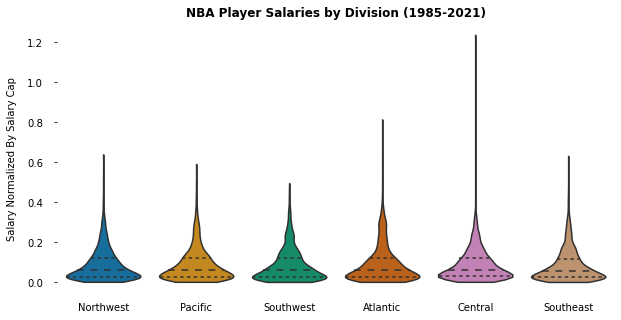

In [65]:
fig = plt.figure(figsize = (10,5))
ax =sns.violinplot(data = df[df["season_type"] == "RS"], x ="division", y = "normalized salary", 
               cut = 0, inner = "quartiles", scale = "width", palette = "colorblind",
                  order = ["Northwest", "Pacific", "Southwest", "Atlantic", "Central", "Southeast"])
# ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 90)
ax.tick_params(axis = "x", pad=5, which='both', bottom = False)
ax.tick_params(axis = "y", pad=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("Salary Normalized By Salary Cap", labelpad = 10)
ax.set_title("NBA Player Salaries by Division (1985-2021)", size = 12, style = "normal", weight = "bold")
plt.savefig("ManneY_draft1.png", dpi = 400, bbox_inches = "tight")

Jordan's outrageous salary during the last dance since there were no laws against paying past the salary cap.

https://fivethirtyeight.com/features/michael-jordan-made-bank-during-the-bulls-last-dance/#:~:text=Jordan%20had%20earned%20a%20combined,precedent%20after%20adjusting%20for%20inflation.


In [7]:
df.iloc[np.argmax(df["normalized salary"])] 

player_name            Michael Jordan
player_id                   jordami01
season                           1997
season_type                        PO
team                              CHI
poss                             1449
mp                                804
raptor_offense               5.804664
raptor_defense               2.129794
raptor_total                 7.934458
war_total                    4.502755
war_reg_season                    0.0
war_playoffs                 4.502755
predator_offense             6.074194
predator_defense             2.162149
predator_total               8.236343
pace_impact                 -0.340903
lg                                NBA
salary                     30140000.0
normalized salary            1.237122
division                      Central
season-eW            (1994.0, 2003.0]
season-eF            (1996.0, 2006.0]
Name: 10289, dtype: object

In [8]:
np.sort(df["season"].unique()) # missing all data for 1999-2000 data

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021])

In [9]:
2021-1985

36

### Raptor Offensive v Raptor Defensive
---

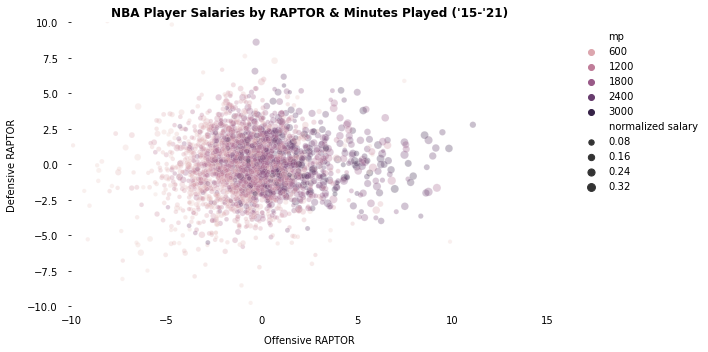

In [10]:
fig = plt.figure(figsize = (10,5))
rs = df[df["season_type"] == "RS"]
sns.scatterplot(data = rs[rs["season"]>2014], x = "raptor_offense", y = "raptor_defense",
                alpha =0.3 , hue = "mp", size = "normalized salary")
plt.xlim(-10,15)
plt.ylim(-10,10)
ax = plt.gca()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, frameon = False)
ax.tick_params(axis = "x", pad=5, which='both', bottom = False)
ax.tick_params(axis = "y", pad=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("Offensive RAPTOR", labelpad = 10)
ax.set_ylabel("Defensive RAPTOR", labelpad = 10)
plt.title("NBA Player Salaries by RAPTOR & Minutes Played ('15-'21)", size = 12, style = "normal", weight = "bold")
plt.savefig("ManneY_draft2.png", dpi = 400, bbox_inches = "tight")
plt.tight_layout()

In [11]:
df

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_offense,predator_defense,predator_total,pace_impact,lg,salary,normalized salary,division,season-eW,season-eF
0,Alaa Abdelnaby,abdelal01,1991,PO,POR,26,13,-6.565556,-1.999625,-8.565181,...,-6.966437,-4.170021,-11.136458,-1.785247,NBA,395000.0,0.033274,Northwest,"(1984.964, 1994.0]","(1984.999, 1996.0]"
1,Alaa Abdelnaby,abdelal01,1991,RS,POR,614,290,-3.827204,-0.447001,-4.274205,...,-3.776125,-1.592067,-5.368192,0.283274,NBA,395000.0,0.033274,Northwest,"(1984.964, 1994.0]","(1984.999, 1996.0]"
2,Alaa Abdelnaby,abdelal01,1992,PO,POR,50,25,-5.430838,-3.112862,-8.543700,...,-5.722269,-4.144577,-9.866847,1.216643,NBA,494000.0,0.039520,Northwest,"(1984.964, 1994.0]","(1984.999, 1996.0]"
3,Alaa Abdelnaby,abdelal01,1992,RS,POR,1948,934,-2.480005,-0.123125,-2.603129,...,-2.416858,-0.634025,-3.050883,0.466668,NBA,494000.0,0.039520,Northwest,"(1984.964, 1994.0]","(1984.999, 1996.0]"
4,Alaa Abdelnaby,abdelal01,1993,PO,BOS,128,68,-9.774333,-3.596499,-13.370831,...,-9.480059,-4.481334,-13.961393,0.456135,NBA,500000.0,0.035714,Atlantic,"(1984.964, 1994.0]","(1984.999, 1996.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20928,Ivica Zubac,zubaciv01,2019,RS,LAC,1141,524,-3.142927,1.774239,-1.368688,...,-3.105152,0.994436,-2.110716,0.120889,NBA,1544951.0,0.015166,Pacific,"(2012.0, 2021.0]","(2014.0, 2021.0]"
20930,Ivica Zubac,zubaciv01,2020,PO,LAC,653,320,1.355250,3.069956,4.425206,...,-1.778379,4.062312,2.283933,-0.401691,NBA,6481482.0,0.059387,Pacific,"(2012.0, 2021.0]","(2014.0, 2021.0]"
20931,Ivica Zubac,zubaciv01,2020,RS,LAC,2794,1326,1.040158,3.661525,4.701684,...,0.032143,3.161284,3.193427,-0.412144,NBA,6481482.0,0.059387,Pacific,"(2012.0, 2021.0]","(2014.0, 2021.0]"
20932,Ivica Zubac,zubaciv01,2021,PO,LAC,590,301,-2.056054,2.840494,0.784440,...,-2.104796,2.298023,0.193227,-0.544855,NBA,7000000.0,0.064138,Pacific,"(2012.0, 2021.0]","(2014.0, 2021.0]"


### Distributions based on Season
---

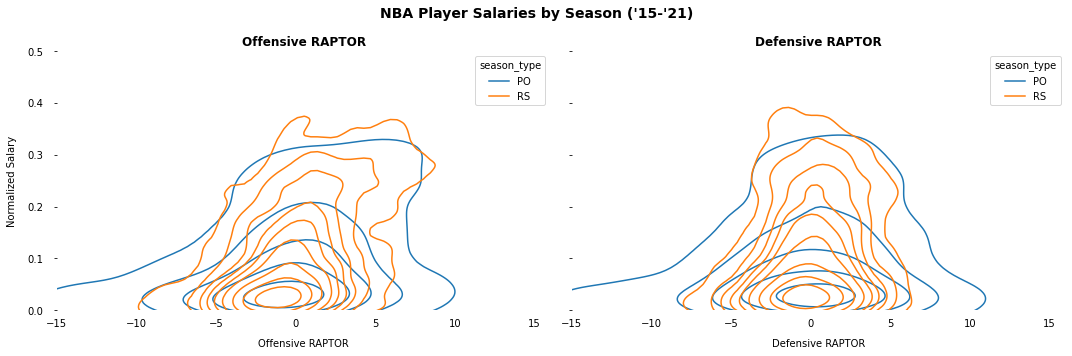

In [23]:
fig, ax = plt.subplots(1,2, sharey = True, figsize = (15,5))
sns.kdeplot(ax = ax[0],data = df[df["season"]>2014], x = "raptor_offense", y="normalized salary", hue = "season_type")
ax[0].set_xlim(-15,16)
ax[0].set_ylim(0,0.5)
# ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, frameon = False)
ax[0].tick_params(axis = "x", pad=5, which='both', bottom = False)
ax[0].tick_params(axis = "y", pad=10)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_xlabel("Offensive RAPTOR", labelpad = 10)
ax[0].set_ylabel("Normalized Salary", labelpad = 10)
ax[0].set_title("Offensive RAPTOR", size = 12, style = "normal", weight = "bold")


sns.kdeplot(ax = ax[1],data = df[df["season"]>2014], x = "raptor_defense", y="normalized salary", hue = "season_type")
ax[1].set_xlim(-15,16)
ax[1].set_ylim(0,0.5)
# ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, frameon = False)
ax[1].tick_params(axis = "x", pad=5, which='both', bottom = False)
ax[1].tick_params(axis = "y", pad=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_xlabel("Defensive RAPTOR", labelpad = 10)
ax[1].set_ylabel("Normalized Salary", labelpad = 10)
ax[1].set_title("Defensive RAPTOR", size = 12, style = "normal", weight = "bold")
plt.suptitle("NBA Player Salaries by Season ('15-'21)", size = 14, style = "normal", weight = "bold")

plt.savefig("ManneY_draft3.png", dpi = 400, bbox_inches = "tight")
plt.tight_layout()

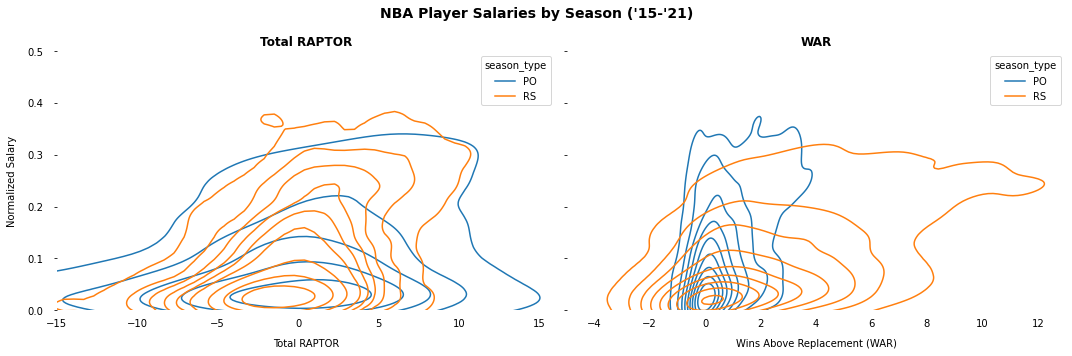

In [25]:
fig, ax = plt.subplots(1,2, sharey = True, figsize = (15,5))
sns.kdeplot(ax = ax[0],data = df[df["season"]>2014], x = "raptor_total", y="normalized salary", hue = "season_type")
ax[0].set_xlim(-15,16)
ax[0].set_ylim(0,0.5)
# ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, frameon = False)
ax[0].tick_params(axis = "x", pad=5, which='both', bottom = False)
ax[0].tick_params(axis = "y", pad=10)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_xlabel("Total RAPTOR", labelpad = 10)
ax[0].set_ylabel("Normalized Salary", labelpad = 10)
ax[0].set_title("Total RAPTOR", size = 12, style = "normal", weight = "bold")


sns.kdeplot(ax = ax[1],data = df[df["season"]>2014], x = "war_total", y="normalized salary", hue = "season_type")
ax[1].set_xlim(-5,13)
ax[1].set_ylim(0,0.5)
# ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, frameon = False)
ax[1].tick_params(axis = "x", pad=5, which='both', bottom = False)
ax[1].tick_params(axis = "y", pad=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_xlabel("Wins Above Replacement (WAR)", labelpad = 10)
ax[1].set_ylabel("Normalized Salary", labelpad = 10)
ax[1].set_title("WAR", size = 12, style = "normal", weight = "bold")
plt.suptitle("NBA Player Salaries by Season ('15-'21)", size = 14, style = "normal", weight = "bold")

plt.savefig("ManneY_draft3.png", dpi = 400, bbox_inches = "tight")
plt.tight_layout()

In [38]:
rs["mp"].sort_values()

11013       0
2057        1
5851        4
7363        4
18696       4
         ... 
9215     3424
6128     3443
12103    3457
9206     3485
17708    3533
Name: mp, Length: 11859, dtype: int64

In [42]:
rs.loc[11013,"mp"] = 1

In [70]:
df["val_per_dol"] = df["war_total"] / df["normalized salary"] 

In [71]:
salary_year_team = df.groupby(by = ["season_type","season", "team"]).apply(lambda x: np.average(x["normalized salary"], weights = x["mp"])).reset_index()
salary_year_team.columns = ["season_type","season", "team", "norm_sal"]
war_year_team = df.groupby(by = ["season_type","season", "team"]).apply(lambda x: np.average(x["war_total"], weights = x["mp"])).reset_index()
war_year_team.columns = ["season_type","season", "team", "war"]

valDol_year_team = df.groupby(by = ["season_type","season", "team"]).apply(lambda x: np.average(x["val_per_dol"], weights = x["mp"])).reset_index()
valDol_year_team.columns = ["season_type","season", "team", "valDol"]


In [72]:
np.all(salary_year_team.index ==war_year_team.index)

True

In [73]:
salary_year_team.dtypes

season_type     object
season           int64
team            object
norm_sal       float64
dtype: object

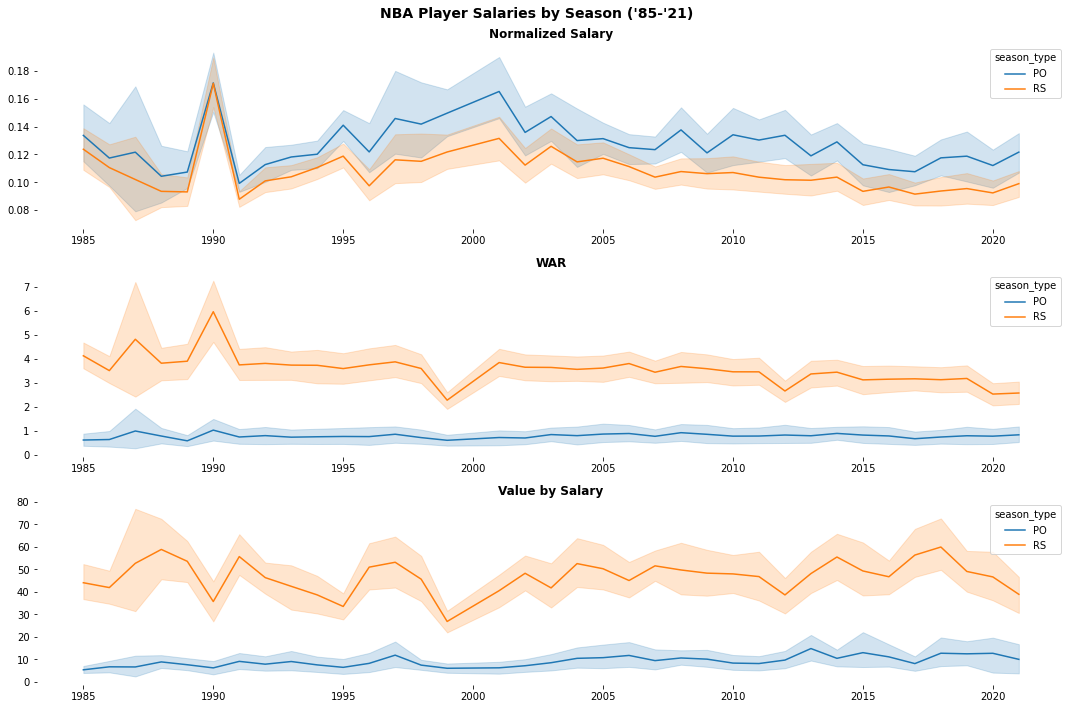

In [75]:
fig = plt.figure(figsize = (15,10))
plt.subplot(311)
sns.lineplot(data = salary_year_team, x = "season", y = 'norm_sal', hue = "season_type")
plt.xlabel("")
plt.ylabel("")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title("Normalized Salary", size = 12, style = "normal", weight = "bold")

plt.subplot(312)
sns.lineplot(data = war_year_team, x = "season", y = 'war', hue = "season_type")
plt.xlabel("")
plt.ylabel("")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title("WAR", size = 12, style = "normal", weight = "bold")


plt.subplot(313)
sns.lineplot(data = valDol_year_team, x = "season", y = 'valDol', hue = "season_type")
plt.title("Value by Salary")
plt.xlabel("")
plt.ylabel("")

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title("Value by Salary", size = 12, style = "normal", weight = "bold")

plt.suptitle("NBA Player Salaries by Season ('85-'21)", size = 14, style = "normal", weight = "bold")

plt.tight_layout()

plt.savefig("ManneY_draft4.png", dpi = 400, bbox_inches = "tight")
